#### Challenge

you'll use this dataset of article open-access prices paid by the WELLCOME Trust between 2012 and 2013.

* You may may want to look into data encoding methods  https://stackoverflow.com/questions/2241348/what-is-unicode-utf-8-utf-16

* For a real bonus round, identify the open access prices paid by subject area.


Unicode is a standard which maps the characters in all languages to a particular numeric value called Code Points. The reason it does this is that it allows different encodings to be possible using the same set of code points.

UTF-8 and UTF-16 are two such encodings. They take code points as input and encodes them using some well-defined formula to produce the encoded string.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
# solve the issue of unicode by using encoding = 'unicode_escape'
data = pd.read_csv('datasets/WELLCOME_APCspend2013_forThinkful.csv', encoding = 'unicode_escape') # This does not have the region
#data2 = pd.read_csv('datasets/world-happiness-report/2015.csv')
#data3 = pd.read_csv('datasets/world-happiness-report/2016.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


In [101]:
# Renaming columns so we can work better with it
# DataFrame.rename(self, mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore')
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

data.rename(columns = {'PMID/PMCID':'PMC_ID', 'Journal title':'journal_title', 'Article title':'article_title','COST (£) charged to Wellcome (inc VAT when charged)':'cost_in_Pounds'},inplace=True)

In [102]:
#lowercase all string so we can group by correctly

data['Publisher'] = data['Publisher'].str.lower()
data['journal_title'] = data['journal_title'].str.lower()
data['article_title'] = data['article_title'].str.lower()

In [103]:
# eliminating the pound sign so we can do calculation with that column

data['cost_in_Pounds'] = data['cost_in_Pounds'].str[1:]

#data["journal_title"] = data["journal_title"].apply(str.strip).replace("£", "")

In [121]:
# convert cost in pounds to float

data["cost_in_Pounds"] = data["cost_in_Pounds"].str.replace("$", "")

#data['cost_in_Pounds'] = data['cost_in_Pounds'].astype(float)

data['cost_in_Pounds'] = pd.to_numeric(data['cost_in_Pounds'], downcast="float")

In [122]:
# chacking that all cost in pounds values are numbers

#data["cost_in_Pounds"].mean()

24060.97265625

In [107]:
data.head(10)

,PMC_ID,Publisher,journal_title,article_title,cost_in_Pounds
0,NaN,cup,psychological medicine,reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,acs,biomacromolecules,structural characterization of a model gram-ne...,2381.04
2,23043264 PMC3506128,acs,j med chem,"fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,acs,j med chem,orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,acs,j org chem,regioselective opening of myo-inositol orthoes...,685.88
5,PMC3579457,acs,journal of medicinal chemistry,comparative structural and functional studies ...,2392.20
6,PMC3709265,acs,journal of proteome research,mapping proteolytic processing in the secretom...,2367.95
7,23057412 PMC3495574,acs,mol pharm,quantitative silencing of egfp reporter gene b...,649.33
8,PMCID: PMC3780468,acs (amercian chemical society) publications,acs chemical biology,a novel allosteric inhibitor of the uridine di...,1294.59
9,PMCID: PMC3621575,acs (amercian chemical society) publications,acs chemical biology,chemical proteomic analysis reveals the drugab...,1294.78


In [47]:
# checking to see if values are null
data.isnull()

,PMC_ID,Publisher,journal_title,article_title,cost_in_Pounds
0,True,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2122,False,False,False,False,False
2123,False,False,False,False,False
2124,False,False,False,False,False
2125,False,False,False,False,False


In [110]:
data.isnull().sum()*100/data.isnull().count()

#data.journal_title.value_counts()

PMC_ID            9.355900
Publisher         0.000000
journal_title     0.047015
article_title     0.000000
cost_in_Pounds    0.000000
dtype: float64

In [19]:
# 2127 rows × 5 columns


#with open('datasets/WELLCOME_APCspend2013_forThinkful.csv','rb') as f:
   # data = f.read()

#for line in data:
   # print(line)

* To complete this challenge, determine the five most common journals and the total articles for each. 


In [126]:
# how many journals are there
data['journal_title'].count()

2126

In [128]:
# how many distinct journals are there

data['journal_title'].nunique()

# This gives the same number of journals as data['journal_title'].value_counts() #928

plos one                           190
journal of biological chemistry     53
neuroimage                          29
plos pathogens                      24
plos genetics                       24
                                  ... 
age and ageing                       1
nutrition journal                    1
cognitive development                1
arthritis research and therapy       1
development genes and evolution      1
Name: journal_title, Length: 928, dtype: int64

Text(0, 0.5, 'Total Count of journals')

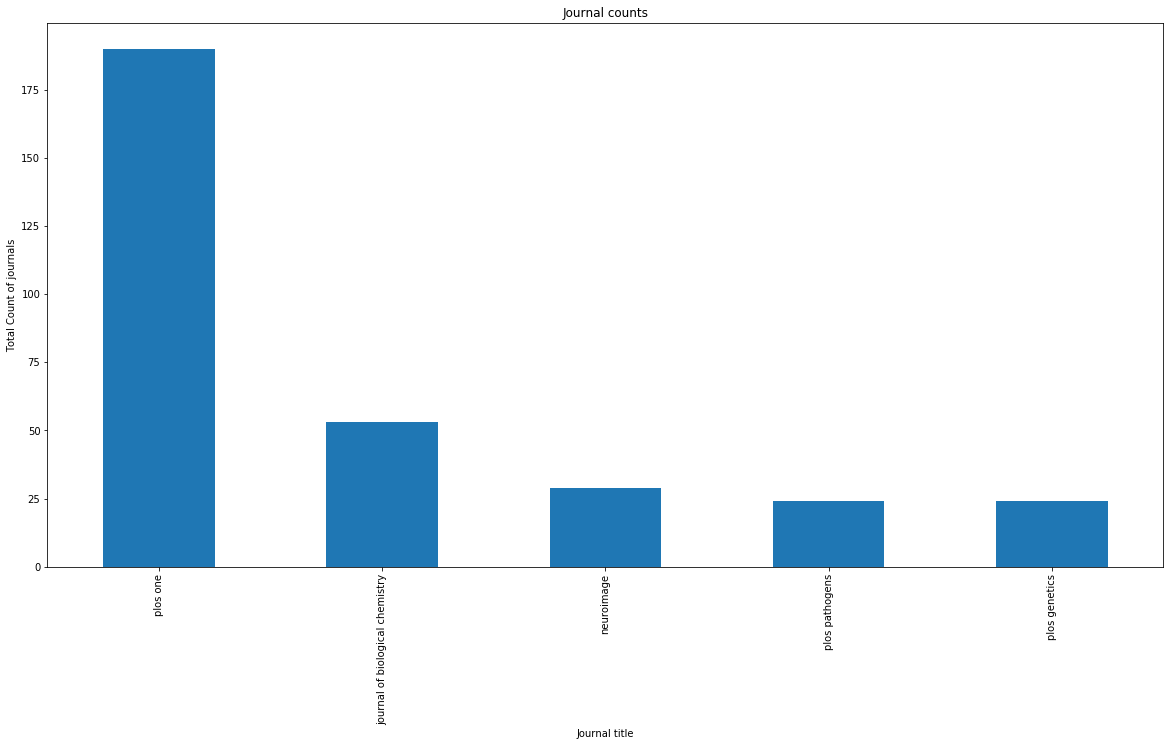

In [59]:
#plt.bar(x_pos, Y_pos, color='green')
#plt.xlabel("X")
#plt.ylabel("Y")
#plt.title("Title")

# value_count already takes care of NANs 

data.journal_title.value_counts().head(5).plot(kind='bar', figsize=(20, 10))
plt.title('Journal counts')
plt.xlabel('Journal title')
plt.ylabel('Total Count of journals')


In [71]:
data.groupby(['journal_title',])['article_title'].count()


journal_title
academy of nutrition and dietetics                                1
acs chemical biology                                              5
acs chemical neuroscience                                         1
acs nano                                                          2
acta crystallographica section d,  biological crystallography     1
                                                                 ..
virology journal                                                  1
virus research                                                    1
vision research                                                   2
visual neuroscience                                               1
zoonoses and public health                                        1
Name: article_title, Length: 928, dtype: int64

* Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

In [123]:
data.describe()

,cost_in_Pounds
count,2127.000000
mean,24060.972656
std,146861.515625
min,0.000000
25%,1272.924988
50%,1883.709961
75%,2321.304932
max,999999.000000


In [125]:
data['cost_in_Pounds'].median()

1883.7099609375

In [130]:
data.groupby(['journal_title']).mean()

,cost_in_Pounds
journal_title,
academy of nutrition and dietetics,2379.540039
acs chemical biology,1418.186035
acs chemical neuroscience,1186.800049
acs nano,668.140015
"acta crystallographica section d, biological crystallography",771.419983
...,...
virology journal,1242.000000
virus research,1947.089966
vision research,500727.593750


In [137]:
data.groupby(['journal_title']).median()

,cost_in_Pounds
journal_title,
academy of nutrition and dietetics,2379.540039
acs chemical biology,1294.589966
acs chemical neuroscience,1186.800049
acs nano,668.140015
"acta crystallographica section d, biological crystallography",771.419983
...,...
virology journal,1242.000000
virus research,1947.089966
vision research,500727.593750


In [136]:
data.groupby(['journal_title']).std()

,cost_in_Pounds
journal_title,
academy of nutrition and dietetics,NaN
acs chemical biology,507.309540
acs chemical neuroscience,NaN
acs nano,35.708893
"acta crystallographica section d, biological crystallography",NaN
...,...
virology journal,NaN
virus research,NaN
vision research,706076.375000
